### 导入库和数据

In [21]:
import numpy as np
import pandas as pd
import graphviz

In [6]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split


### 查看数据

In [7]:
wine = load_wine()

In [8]:
wine.data.shape

(178, 13)

In [9]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [10]:
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0,0


In [11]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [12]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### 划分数据集

In [13]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [14]:
Xtrain.shape

(124, 13)

In [15]:
Xtest.shape

(54, 13)

### 建立决策树模型

In [16]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.9814814814814815

#### 画出决策树

In [17]:
import matplotlib.pyplot as plt
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

In [18]:
plt.rcParams['font.sans-serif']=['Simhei']
plt.rcParams['axes.unicode_minus']=False

In [19]:
dot_data = tree.export_graphviz(clf,
                                out_file = None,
                                feature_names= feature_name,
                                class_names=["琴酒","雪莉","贝尔摩德"],
                                filled=True,
                                rounded=True)

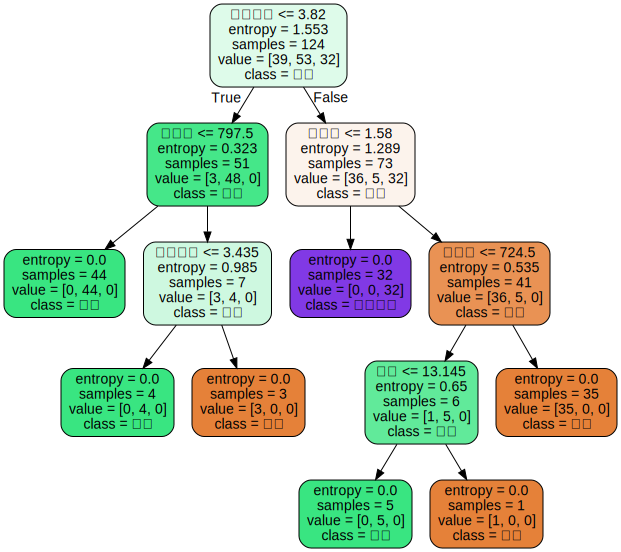

In [22]:
graph = graphviz.Source(dot_data)
graph

In [26]:
# 特征的重要性
clf.feature_importances_

array([0.08265851, 0.        , 0.        , 0.0328398 , 0.07074005,
       0.05080366, 0.37425147, 0.        , 0.        , 0.        ,
       0.05912559, 0.17212272, 0.15745822])

In [24]:
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.02024888180557505),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.37483831909296705),
 ('类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.46163579664019966),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.14327700246125818)]

#### random_state参数和splitter参数

In [25]:
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=30,splitter='random')
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.9259259259259259

#### 剪枝参数

##### max_depth

限制树的最⼤深度，超过设定深度的树枝全部剪掉。实际使⽤时，建议从=3开始尝试，看看拟合的效果再 决定是否增加设定深度。

In [29]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.9629629629629629

##### min_samples_leaf & min_samples_split

min_samples_leaf：限定⼀个结点在分⽀后的每个⼦结点都必须包含⾄少min_samples_leaf个训练样本，否则分⽀就不会发⽣，或者，分⽀会朝着满⾜每个⼦结点都包含min_samples_leaf个样本的⽅向去发⽣。⼀般搭配max_depth使⽤，在回归树中有神奇的效果，可以让模型变得更加平滑。⼀般来说，建议从=5开始使⽤。

min_samples_split：限定⼀个结点必须要包含⾄少min_samples_split个训练样本，这个结点才允许被分⽀，否则分⽀就不会发⽣。


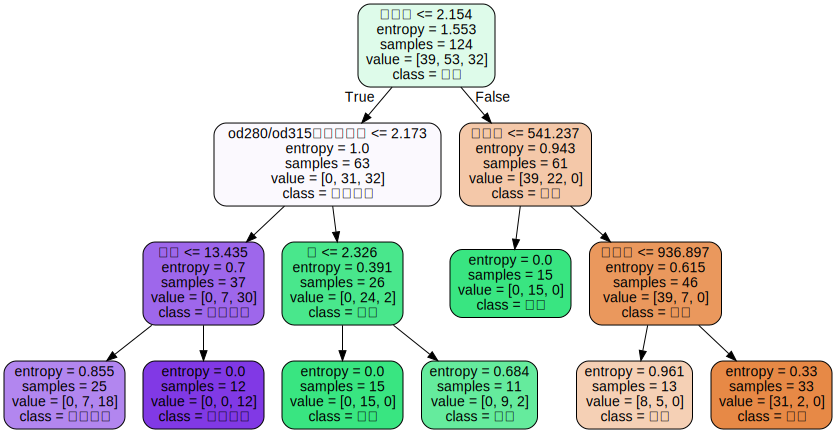

In [31]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                  ,splitter="random"
                                  ,max_depth=3
                                  ,min_samples_leaf=10
                                  ,min_samples_split=10)
clf = clf.fit(Xtrain, Ytrain)

dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","⻉尔摩德"]
                                ,filled=True
                                ,rounded=True) 
graph = graphviz.Source(dot_data)
graph

In [32]:
clf.score(Xtrain,Ytrain)
clf.score(Xtest,Ytest)

0.9259259259259259

##### max_features & min_impurity_decrease

max_features：限制分⽀时考虑的特征个数，超过限制个数的特征都会被舍弃。和max_depth异曲同⼯， max_features是⽤来限制⾼维度数据的过拟合的剪枝参数，但其⽅法⽐较暴⼒，是直接限制可以使⽤的特征数量⽽强⾏使决策树停下的参数，在不知道决策树中的各个特征的重要性的情况下，强⾏设定这个参数可能会导致模型学习不⾜。如果希望通过降维的⽅式防⽌过拟合，建议使⽤PCA，ICA或者特征选择模块中的降维算法。

min_impurity_decrease：限制信息增益的⼤⼩，信息增益⼩于设定数值的分⽀不会发⽣。这是在0.19版本中更新的功能，在0.19版本之前时使⽤min_impurity_split。

##### 调参网格搜索（学习曲线）

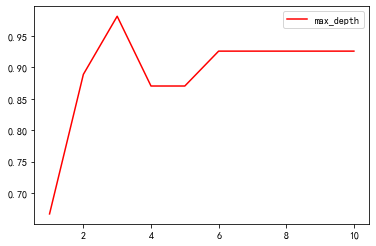

In [33]:
test = []
for i in range(10):
 clf = tree.DecisionTreeClassifier(max_depth=i+1
                                   ,criterion="entropy"
                                   ,random_state=30
                                   ,splitter="random")
 clf = clf.fit(Xtrain, Ytrain)
 score = clf.score(Xtest, Ytest)
 test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

##### 重要属性和接⼝

所有接口中要求输入X_train和X_test的部分，输入的特征矩阵必须至少是一个二维矩阵。sklearn不接受任何一维矩阵作为特征矩阵被输入。如果你的数据的确只有一个特征，那必须用reshape(-1,1)来给矩阵增维；如果你的数据只有一个特征和一个样本，使用reshape(1,-1)来给你的数据增维。

In [35]:
#apply返回每个测试样本所在的叶⼦节点的索引
clf.apply(Xtest)

array([11, 25,  8,  8, 25, 20, 25, 21,  8, 16, 25,  6, 14, 14, 21, 25,  8,
        8, 20, 20, 11, 11,  8, 25, 25, 25, 21, 11, 12, 14, 14, 14, 21, 20,
        8, 25, 21, 14,  8, 20, 12,  8, 21, 16, 14, 25, 20, 11, 25, 25, 25,
       25, 25, 12], dtype=int64)

In [36]:
#predict返回每个测试样本的分类/回归结果
clf.predict(Xtest)

array([2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1, 2, 2,
       2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       1, 0, 1, 2, 0, 0, 0, 0, 0, 1])

⼋个参数：Criterion，两个随机性相关的参数(random_state，splitter)，五个剪枝参数(max_depth,min_samples_split
min_samples_leaf，max_feature，min_impurity_decrease)

⼀个属性：feature_importances_ 

四个接⼝：fit，score，apply，predict

#### 样本不均衡问题

##### SMOTE算法

##### Sklearn中参数class_weight

In [37]:
#1. 创建样本不均衡的数据集
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.datasets import make_blobs

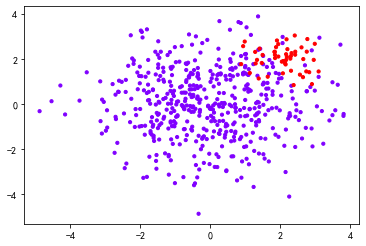

In [39]:
# 2. 创建样本不均衡的数据集
class_1 = 500 #类别1有500个样本
class_2 = 50 #类别2只有50个
centers = [[0,0], [2.0, 2.0]] #设定两个类别的中⼼
clusters_std = [1.5, 0.5] #设定两个类别的⽅差，通常来说，样本量⽐较⼤的类别会更加松散
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=430, shuffle=False)
#看看数据集⻓什么样
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10);
#其中红⾊点是少数类，紫⾊点是多数类

In [40]:
# 3.在数据集上分别建模
#不设定class_weight
clf = DTC(max_depth=4)
clf.fit(X, y)
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
#设定class_weight
wclf = DTC(max_depth=4,class_weight={1: 10})
wclf.fit(X, y)
wclf.predict(X)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [42]:
#给两个模型分别打分看看，这个分数是accuracy准确度
clf.score(X,y)  #准确率

0.9709090909090909

In [43]:
wclf.score(X,y)   #准确率

0.9272727272727272

In [44]:
(y[y==clf.predict(X)]==1).sum()/(y==1).sum()

0.82

In [45]:
(y[y==wclf.predict(X)]==1).sum()/(y==1).sum()

1.0

可以看到，做了样本平衡后，少数类⼏乎全部都被分类正确了，但是多数类有许多被分错了。从准确率的⻆度来看，不做样本平衡的时候准确率反⽽更⾼，做了样本平衡准确率反⽽变低了，这是因为做了样本平衡后，为了要更有效地捕捉出少数类，模型误伤了许多多数类样本，⽽多数类被分错的样本数量 >少数类被分类正确的样本数量，使得模型整体的精确性下降。

现在，如果我们的⽬的是模型整体的准确率，那我们就要拒绝样本平衡，使⽤class_weight被设置之前的模型。

#### 混淆矩阵

##### 各类指标

混淆矩阵是机器学习中总结分类模型预测结果的情形分析表，以矩阵形式将数据集中的记录按照真实的类别与分类模型预测的类别判断两个标准进行汇总。

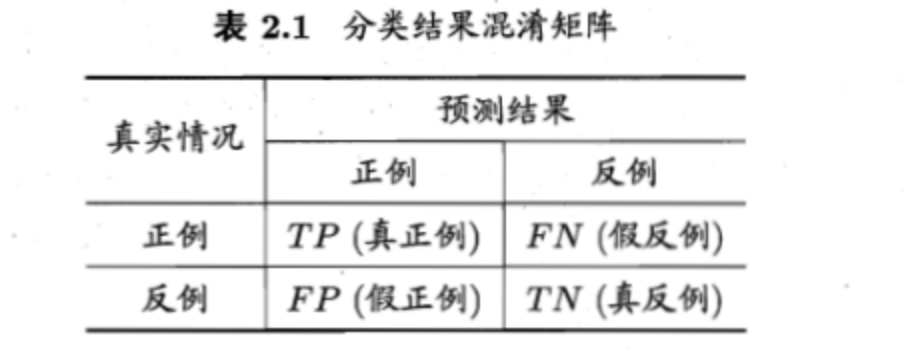

TP(True Positive)：将正类预测为正类数，真实为0，预测也为0

FN(False Negative)：将正类预测为负类数，真实为0，预测为1

FP(False Positive)：将负类预测为正类数， 真实为1，预测为0

TN(True Negative)：将负类预测为负类数，真实为1，预测也为1

那么对于二分类问题来说：

准确率$accuracy = \frac{TP+TN}{TP+FN+FP+TN}$

错误率$Error Rate = \frac{FP+FN}{TP+FN+FP+TN}$


1. 捕捉少数类的艺术

精确率$Precision = \frac{TP}{TP+FP}$

召回率(真正率)$Recall = \frac{TP}{TP+FN}$

$ F1-score = \frac{2}{\frac{1}{precision}+\frac{1}{recall}}=\frac{2*precision*recall}{precision+recall}$

如果我们希望不计⼀切代价，找出少数类（⽐如找出潜在犯罪者的例⼦），那我们就会追求⾼召回率。召回率和精确度是此消彼⻓的，两者之间的平衡代表了捕捉少数类的需求和尽量不要误伤多数类的需求的平衡。

2. 判错多数类的考量：特异度与假正率

特异度 $ Specificity = \frac{TN}{FP+TN}$

假正率 $False Positive Rate = \frac{FP}{FP+TN}$


特异度(Specificity)表示所有真实为0的样本中，被正确预测为0的样本所占的⽐例。
假正率表示⼀个模型将多数类判断错误的能⼒。

##### sklearn包实现

sklearn.metrics.confusion_matrix 混淆矩阵

sklearn.metrics.accuracy_score 准确率accuracy

sklearn.metrics.precision_score 精确度precision

sklearn.metrics.recall_score 召回率recall

sklearn.metrics.precision_recall_curve 精确度-召回率平衡曲线

sklearn.metrics.f1_score F1 measure